# Augmentation

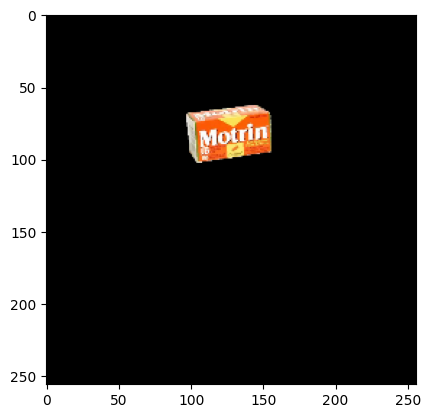

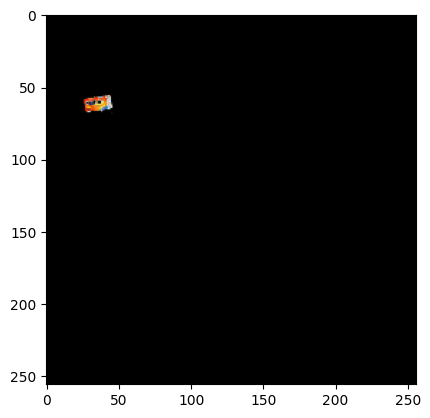

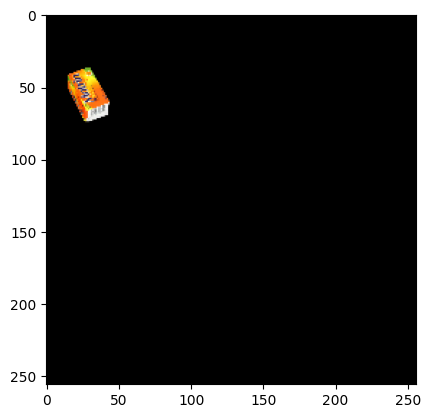

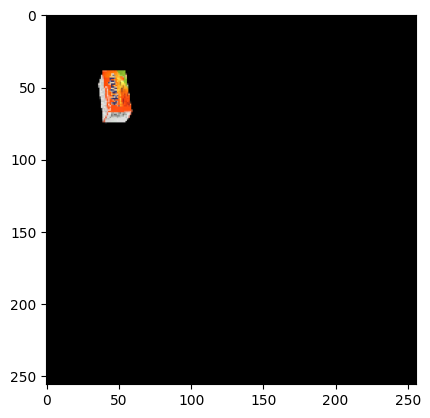

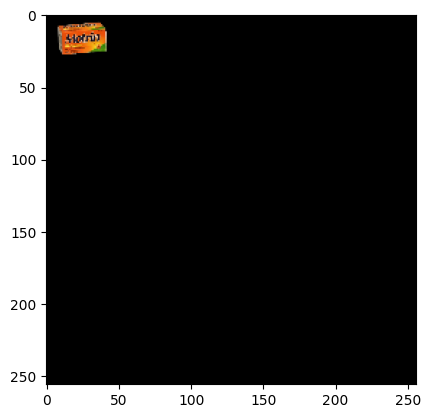

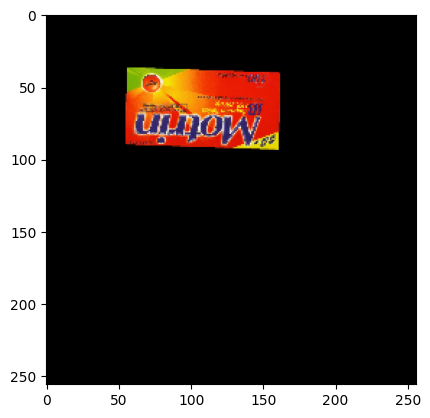

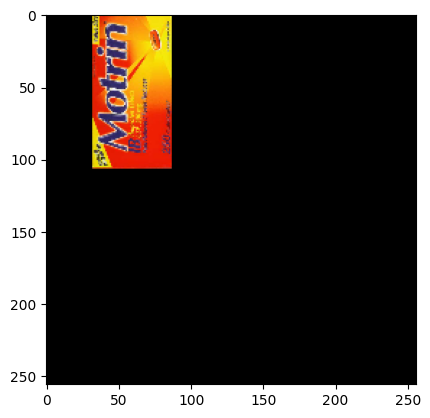

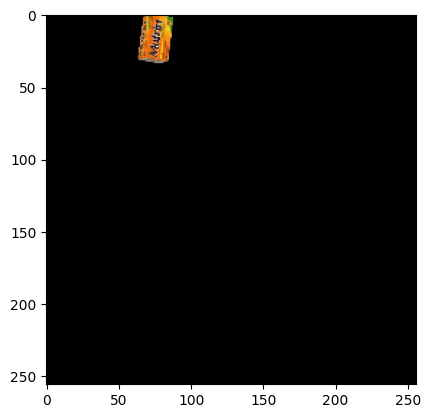

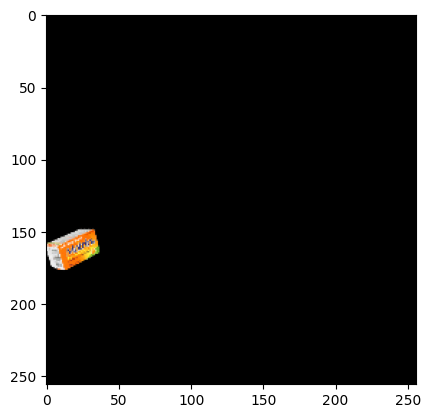

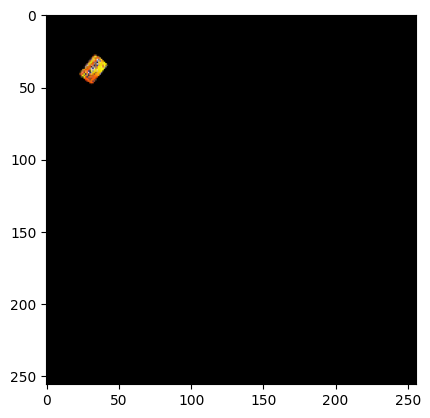

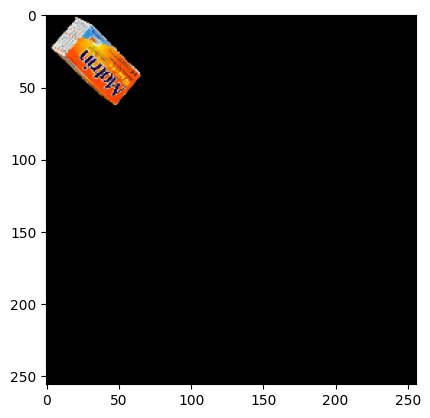

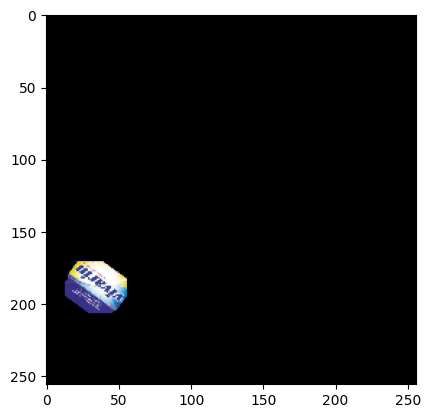

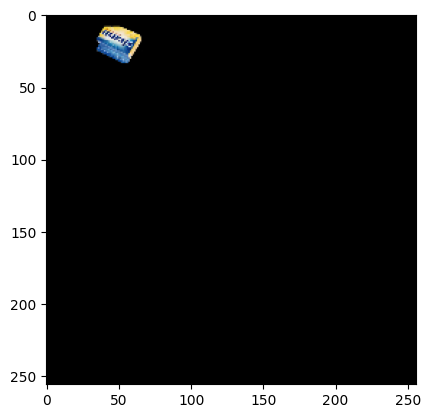

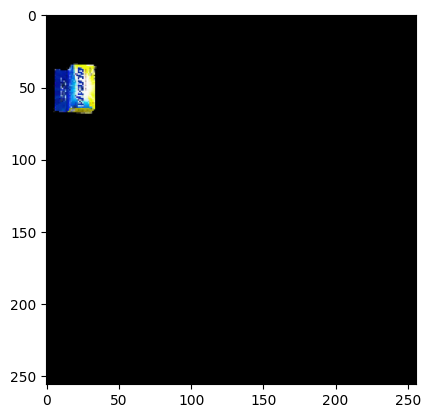

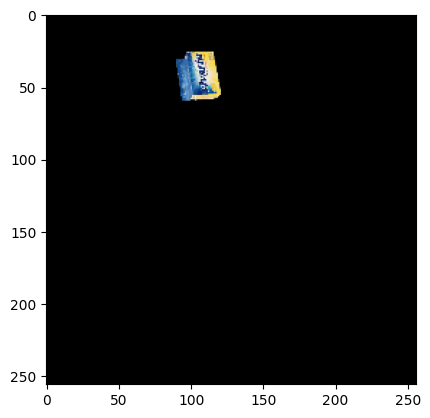

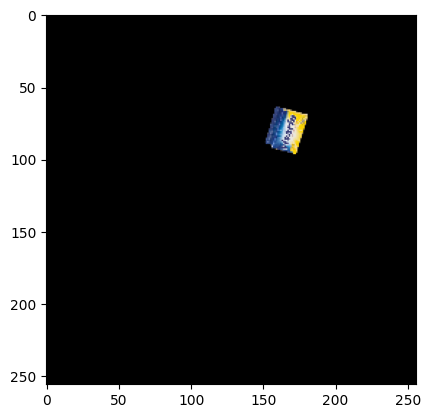

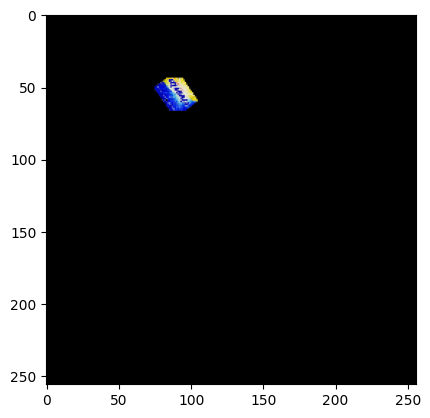

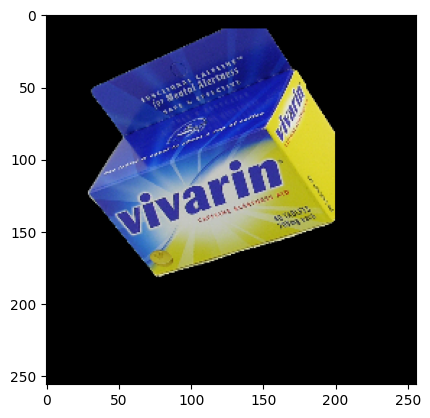

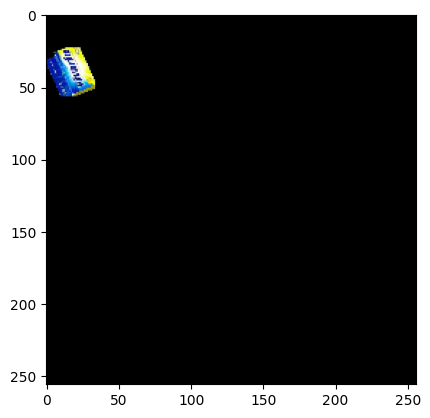

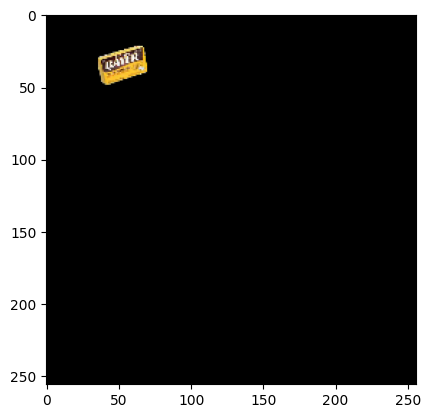

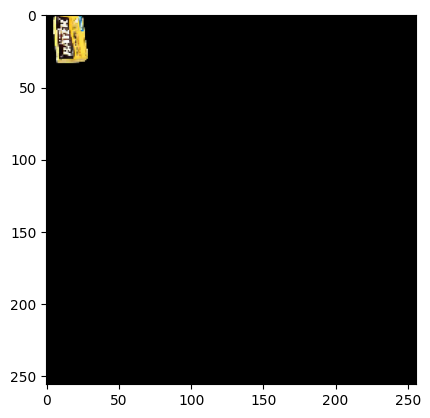

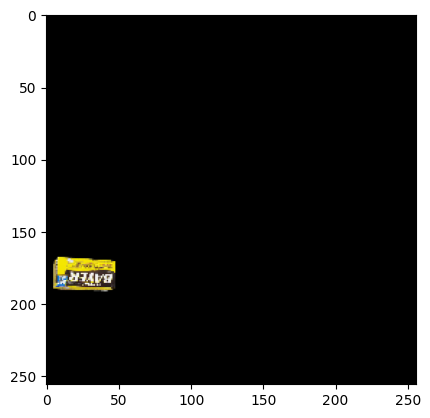

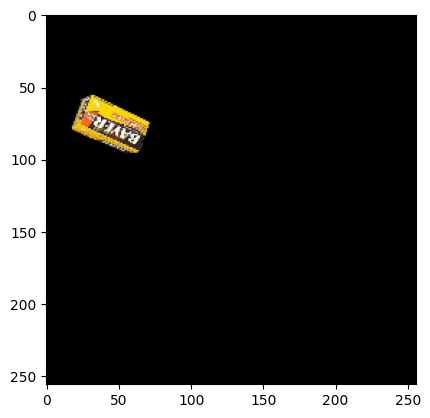

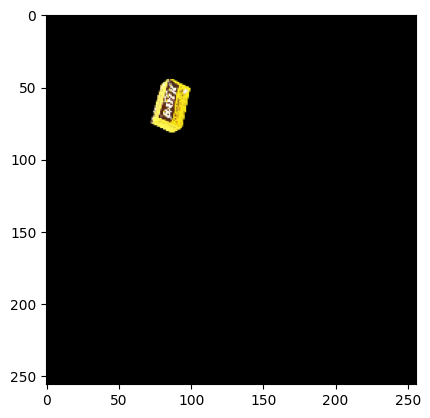

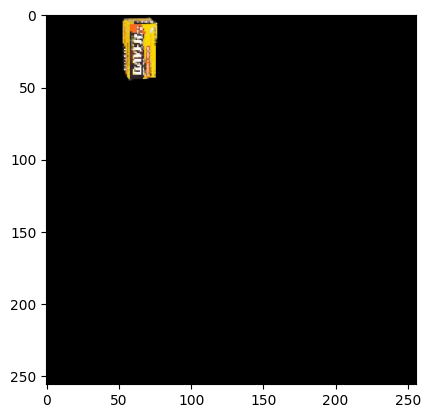

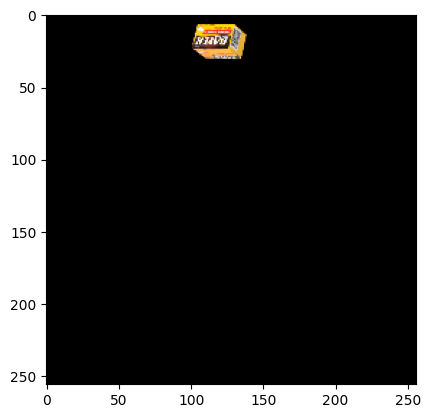

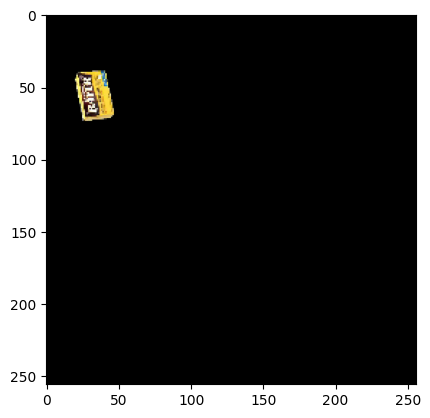

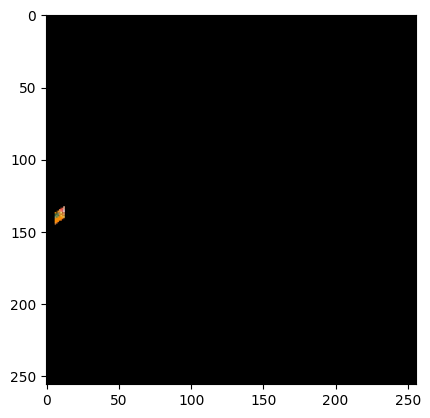

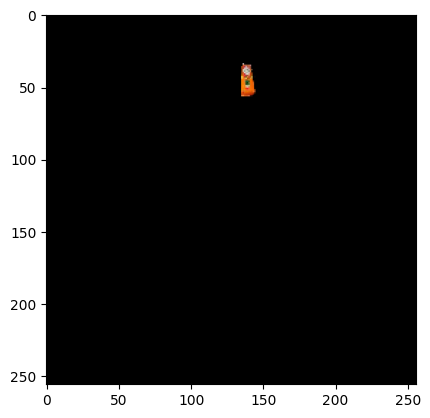

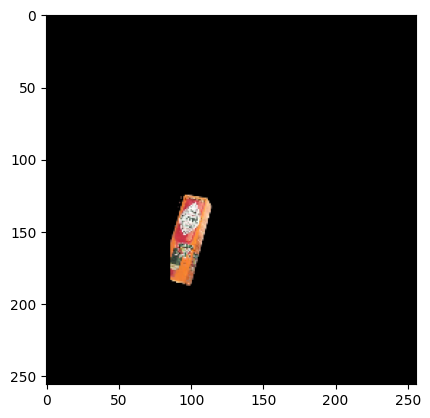

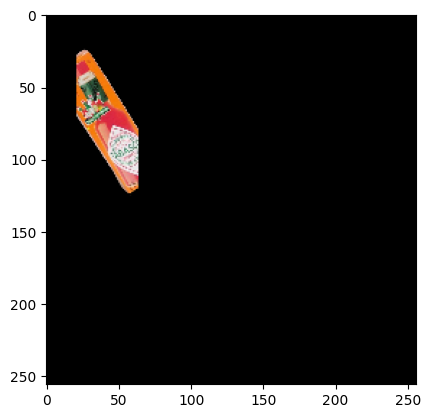

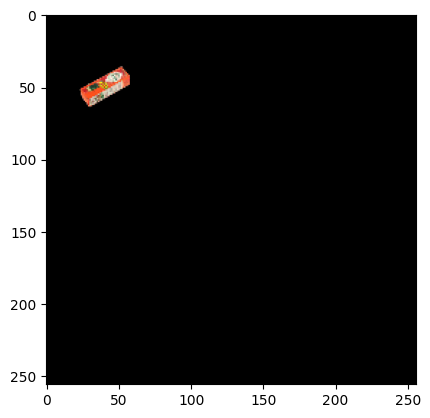

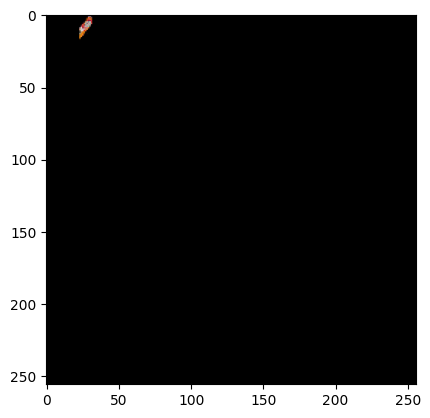

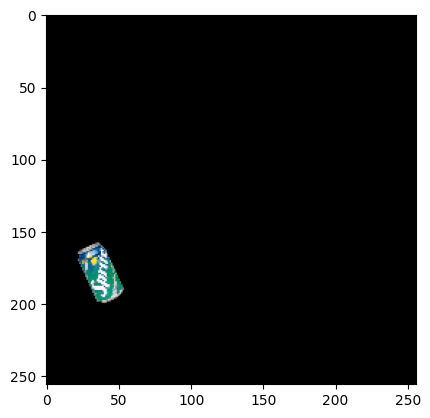

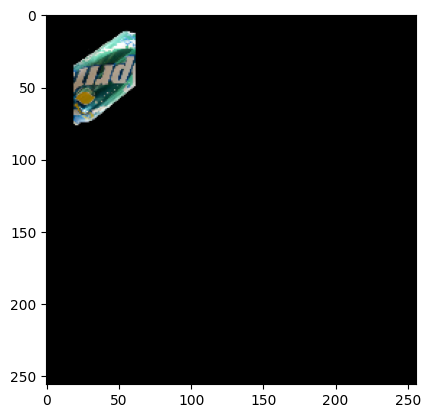

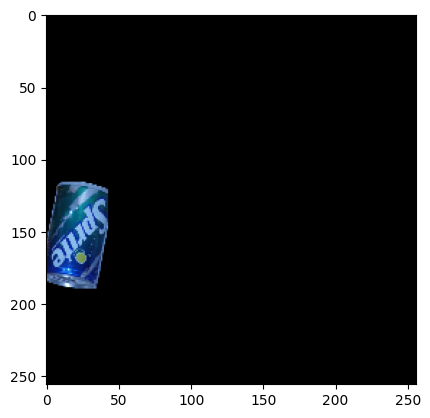

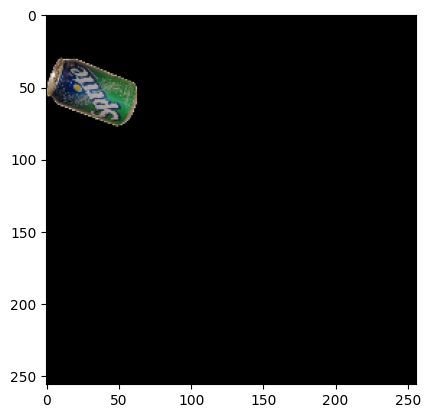

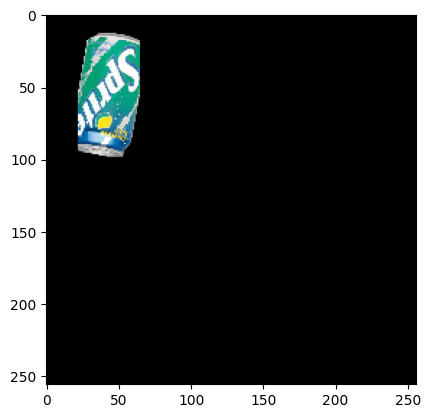

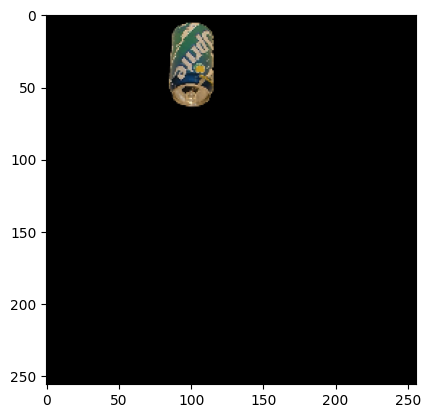

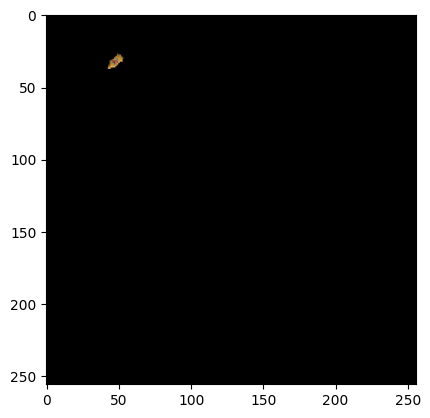

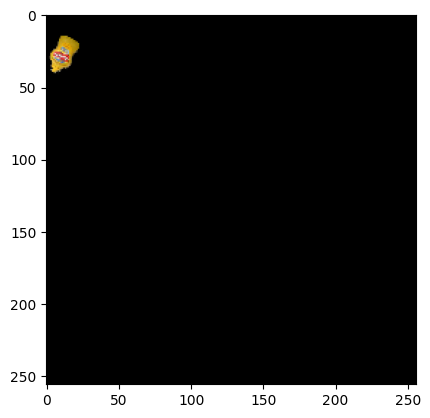

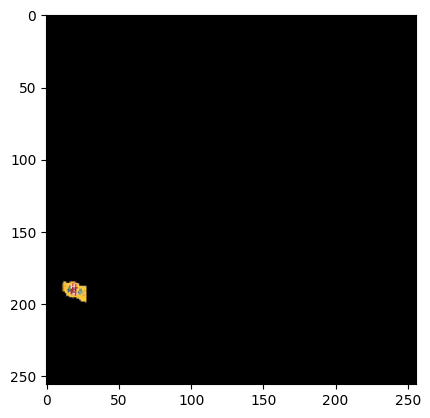

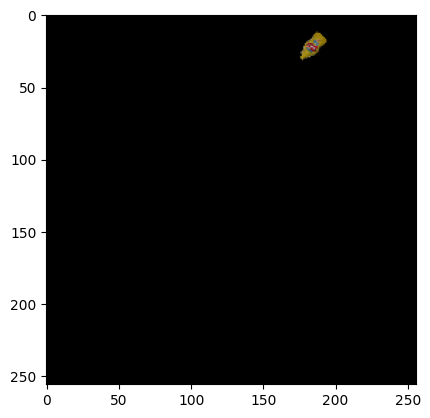

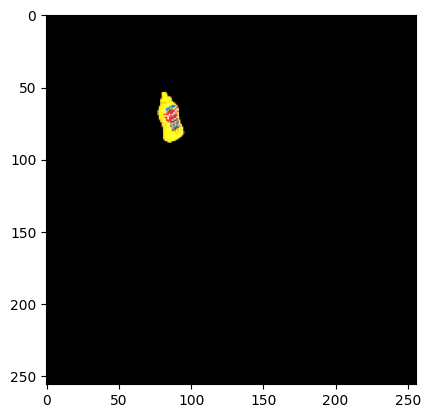

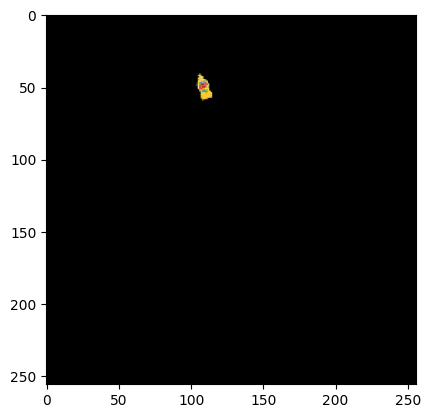

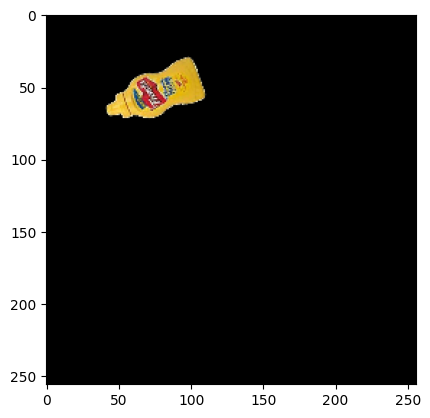

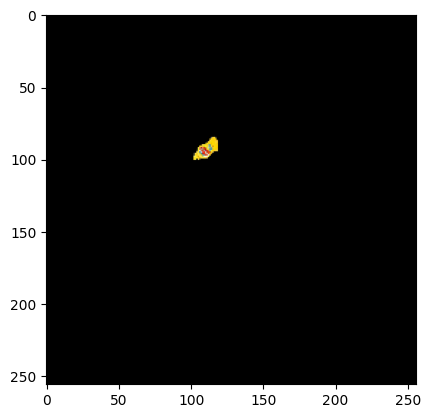

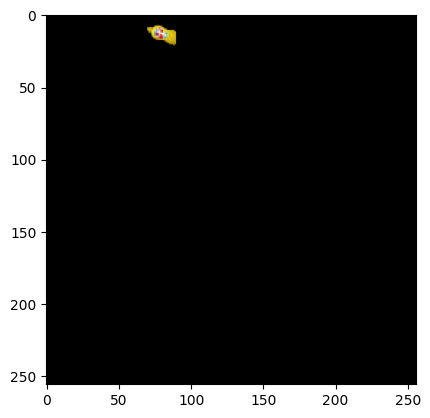

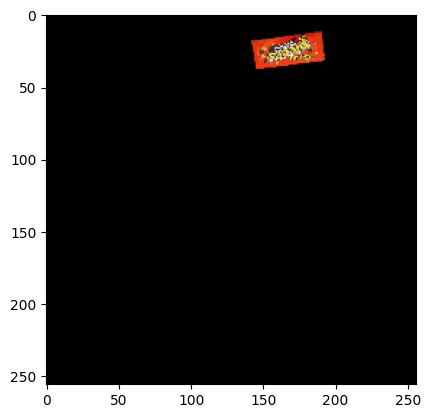

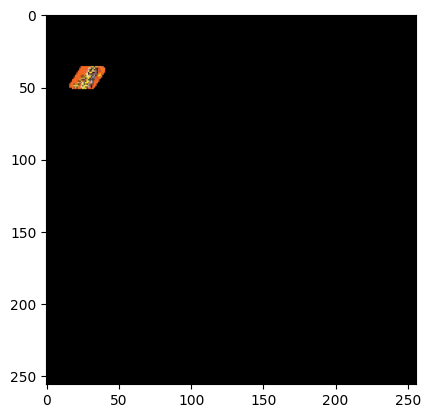

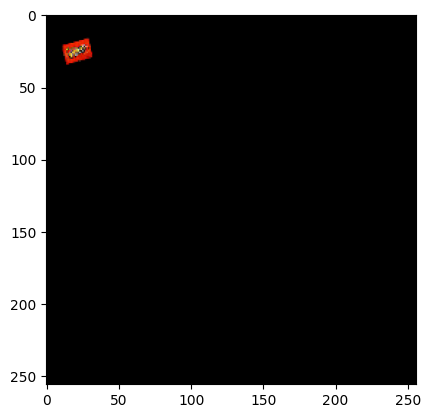

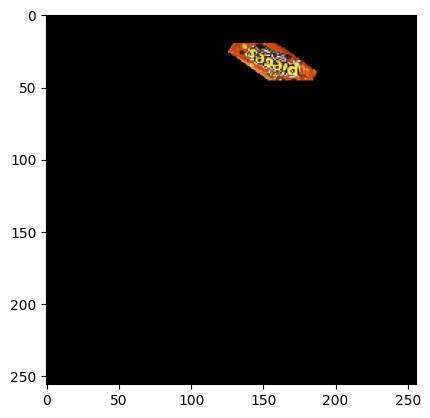

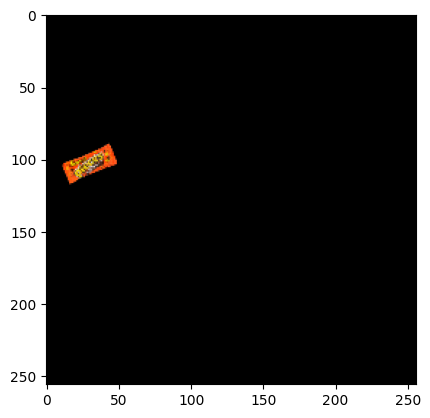

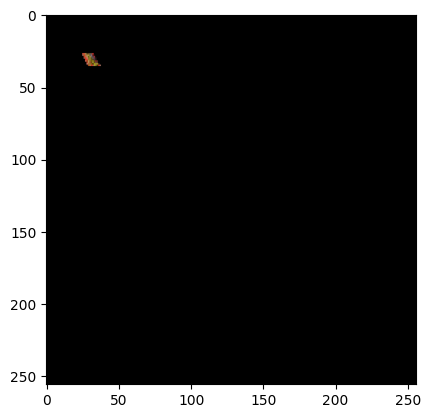

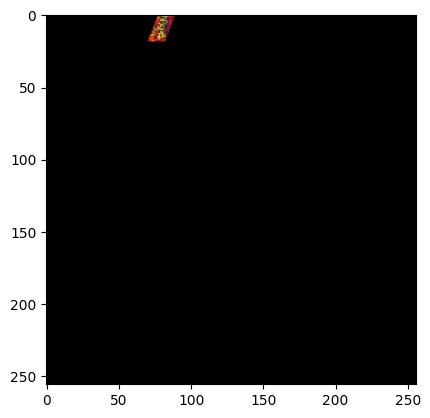

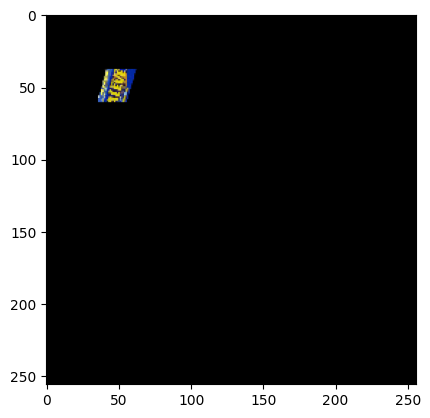

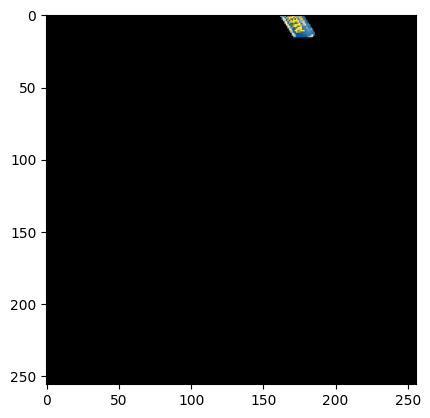

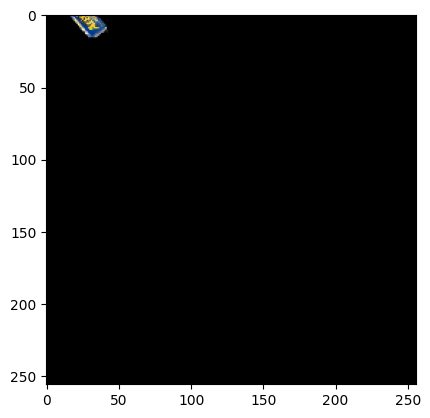

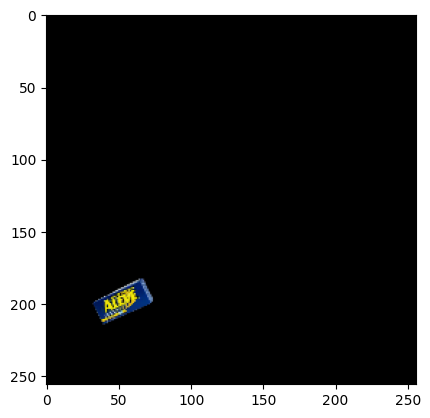

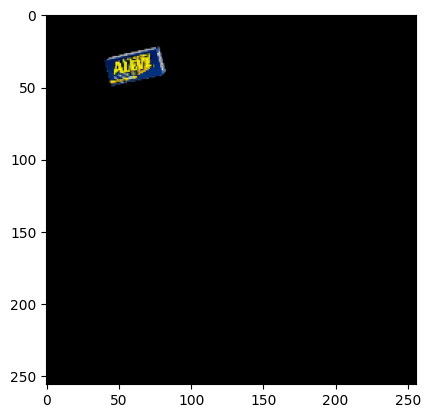

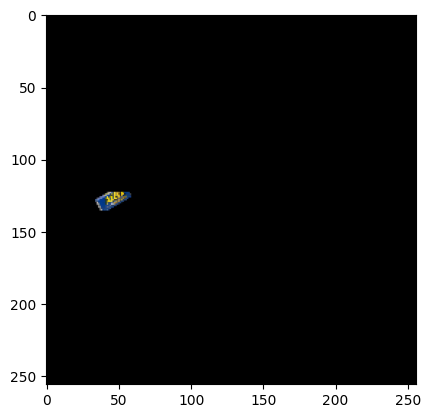

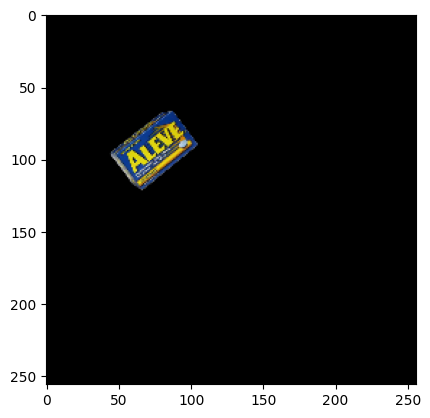

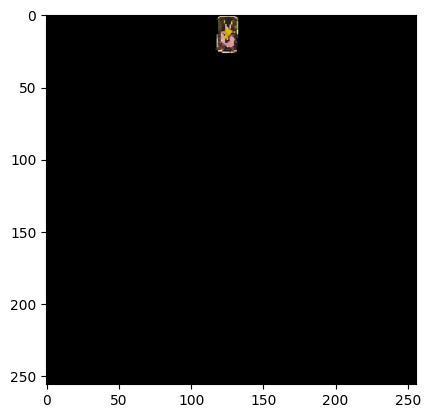

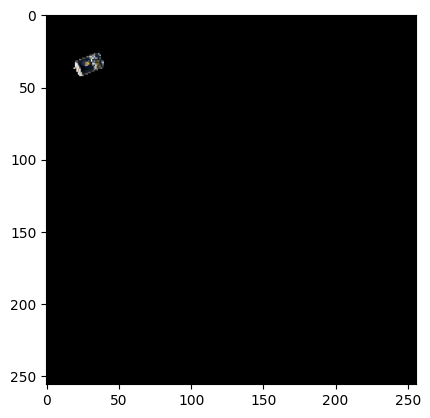

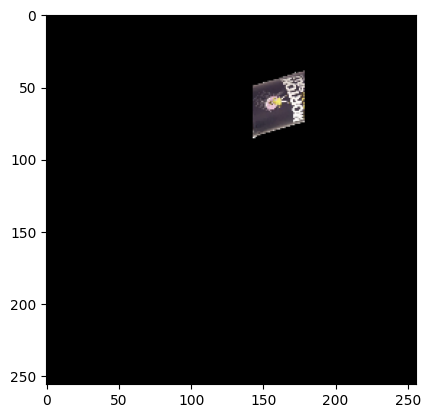

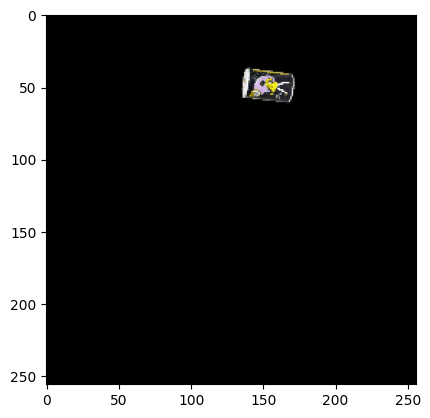

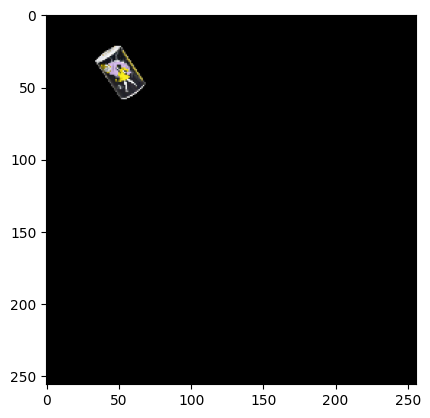

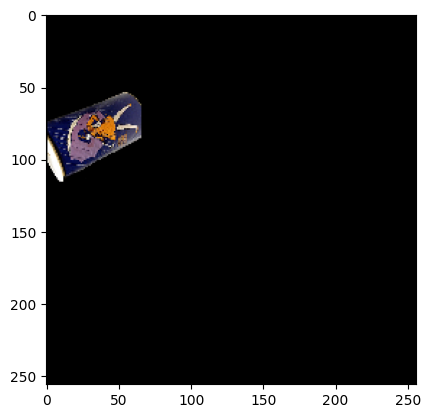

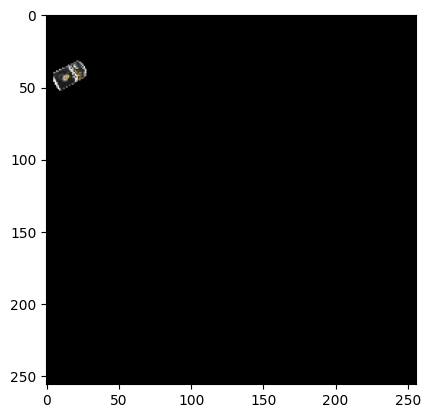

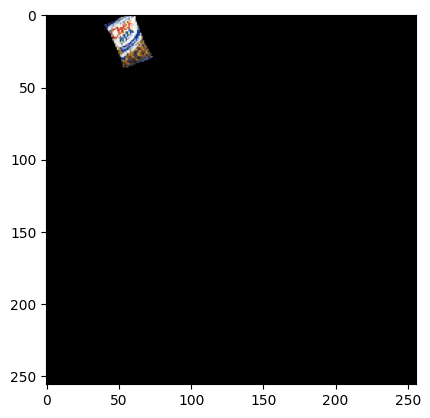

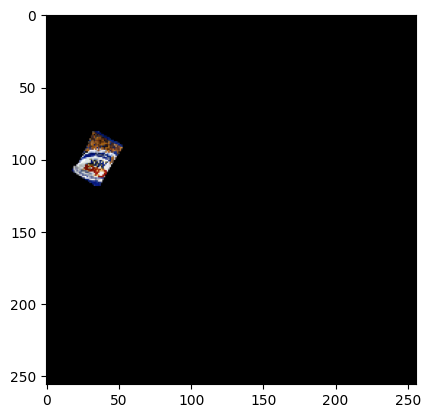

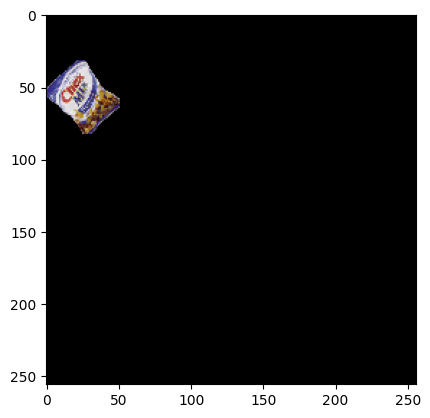

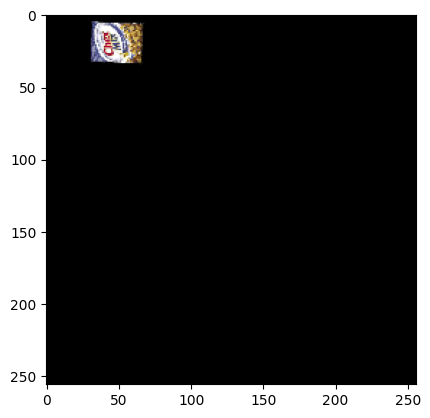

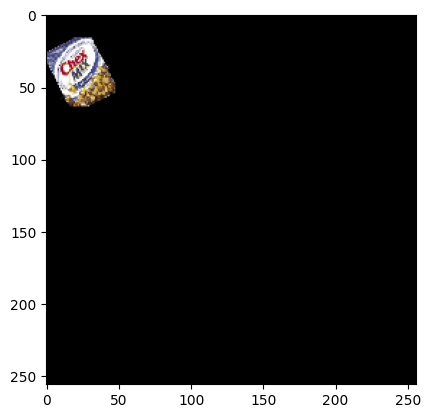

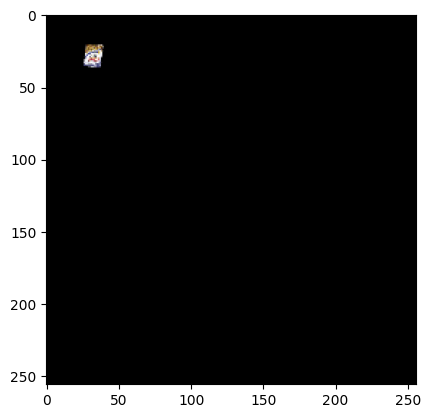

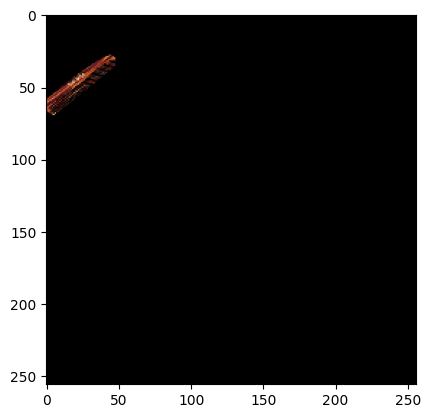

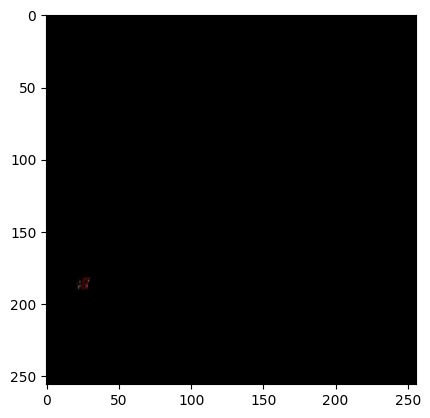

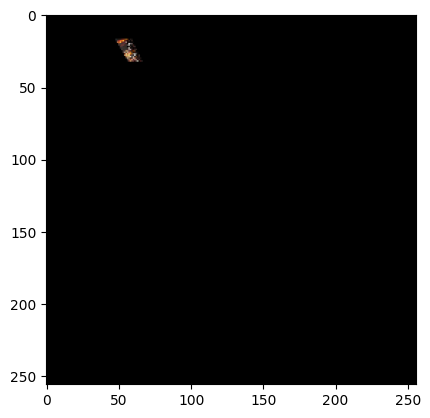

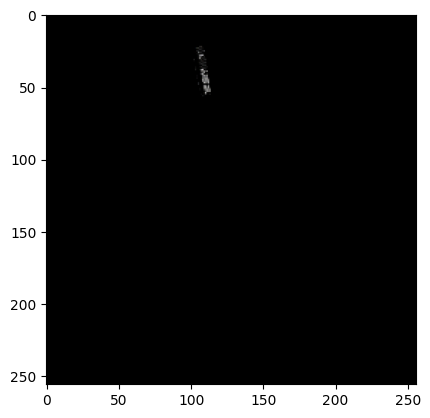

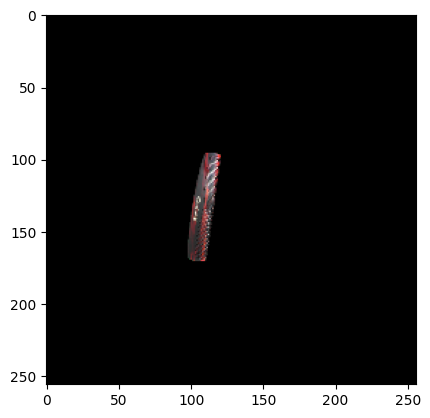

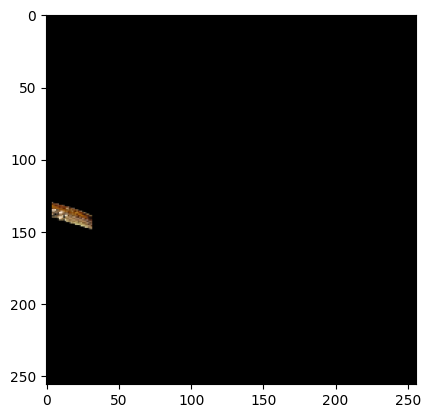

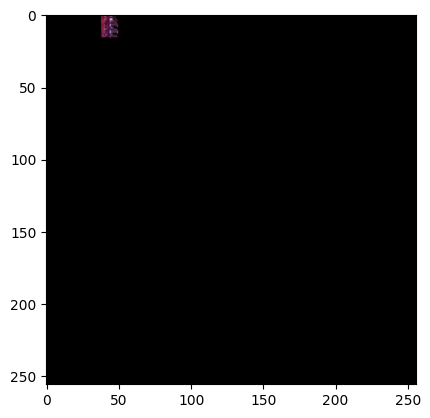

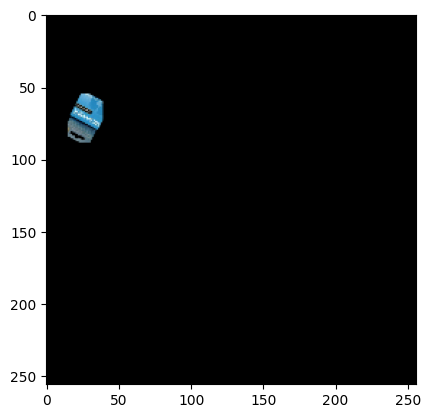

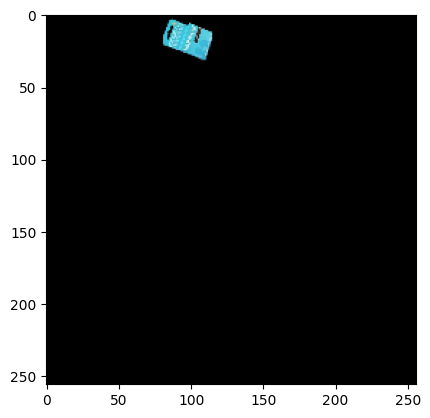

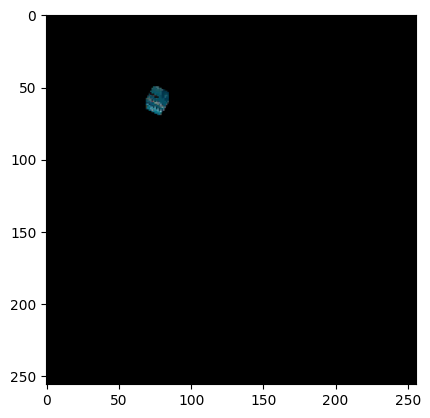

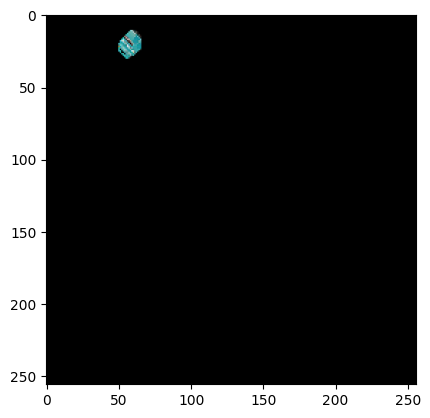

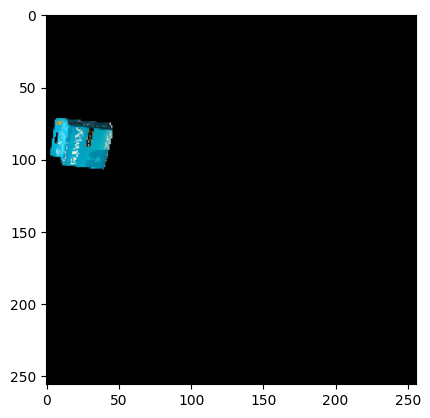

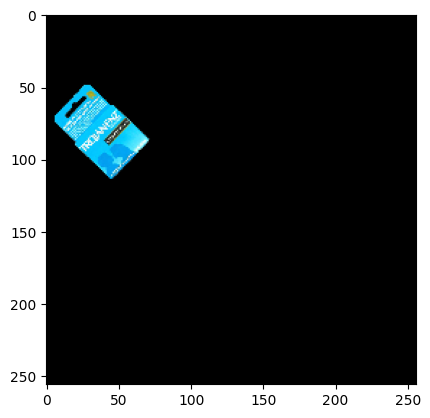

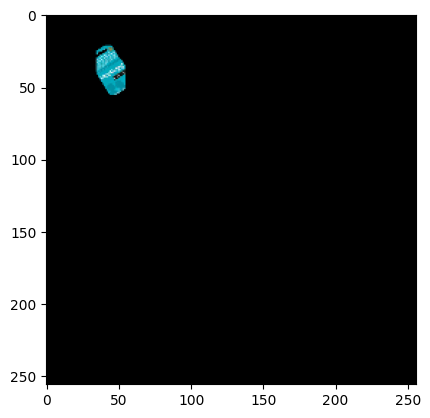

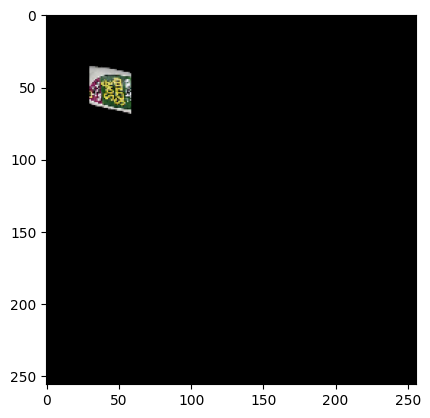

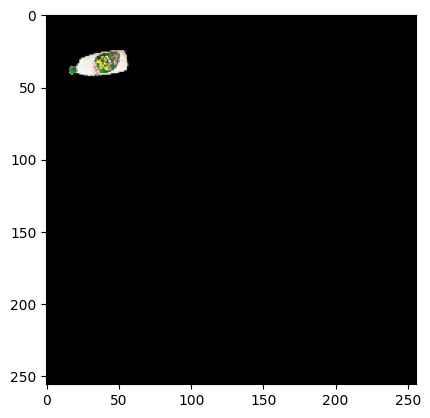

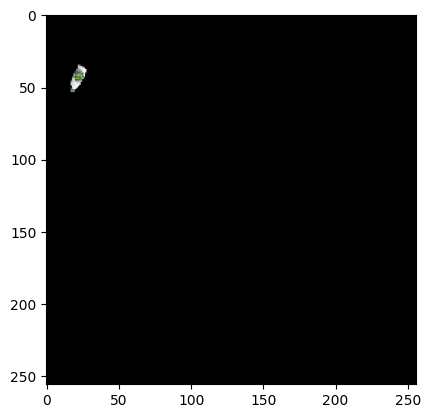

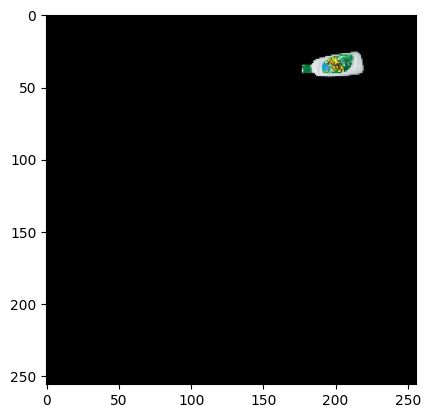

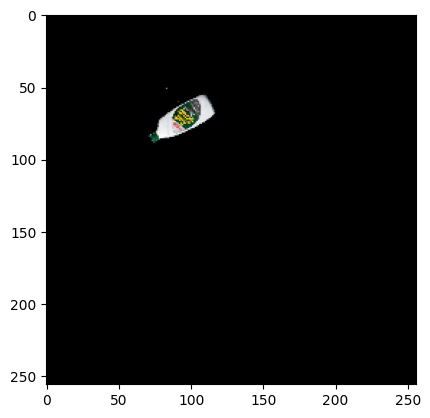

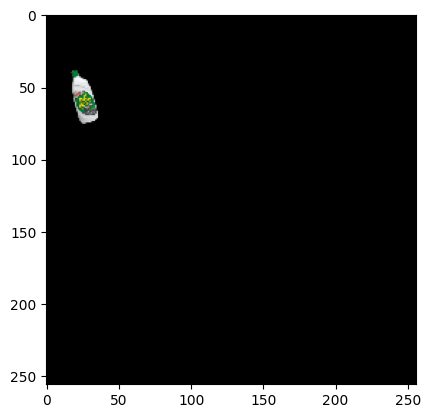

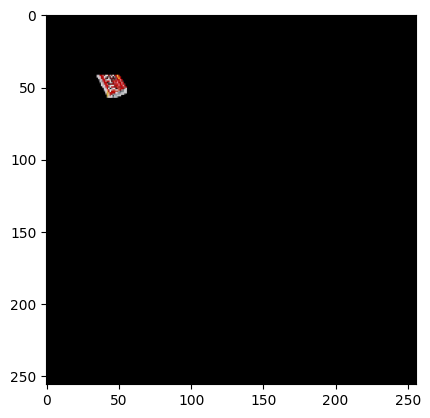

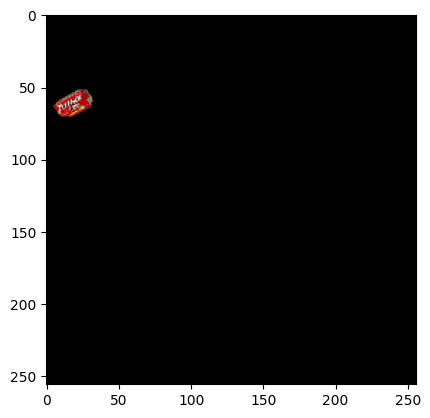

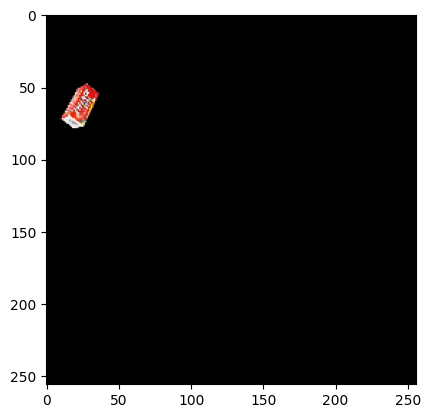

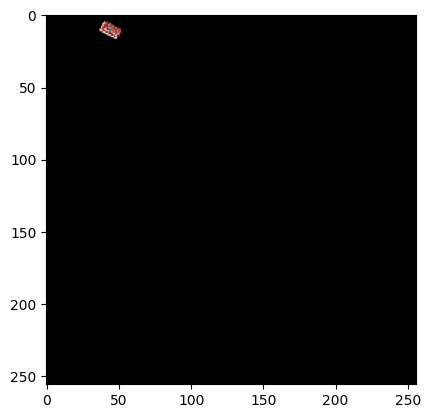

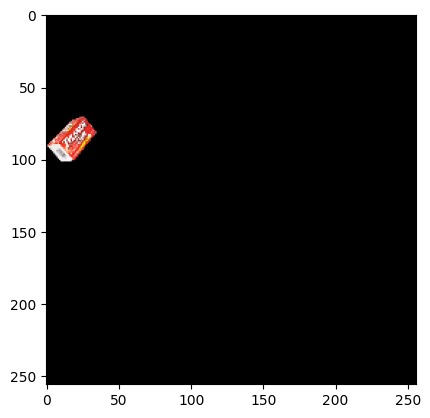

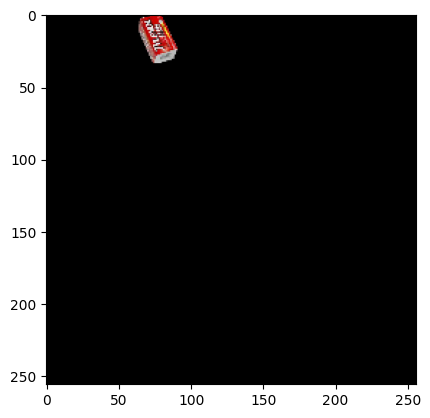

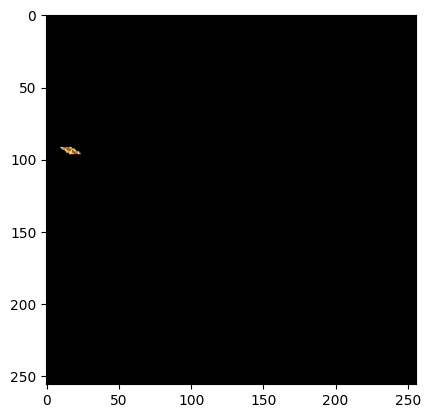

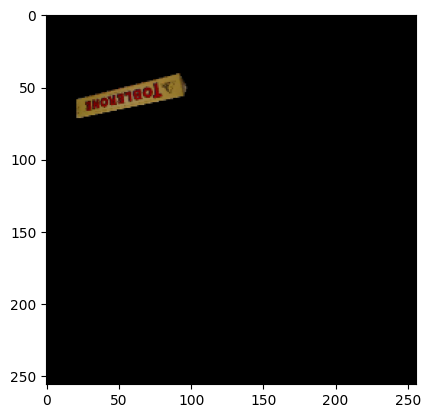

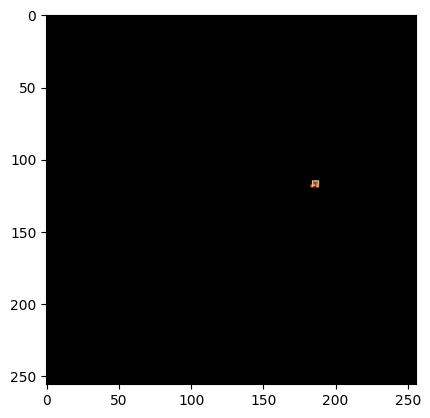

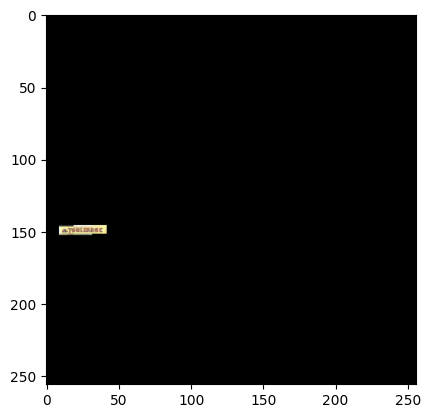

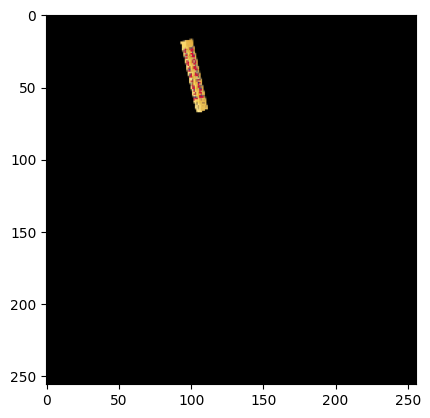

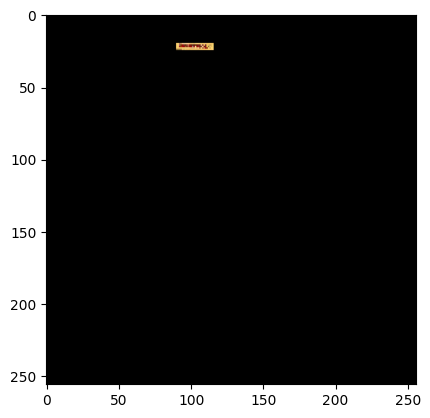

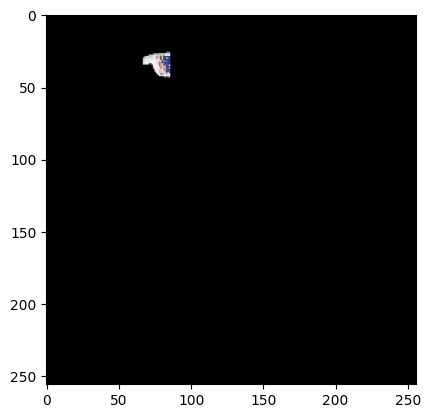

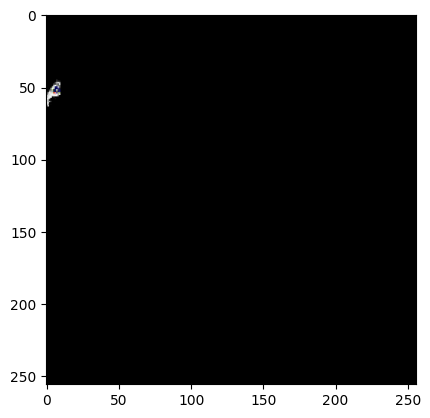

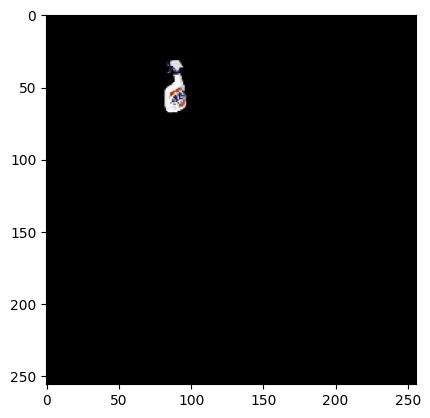

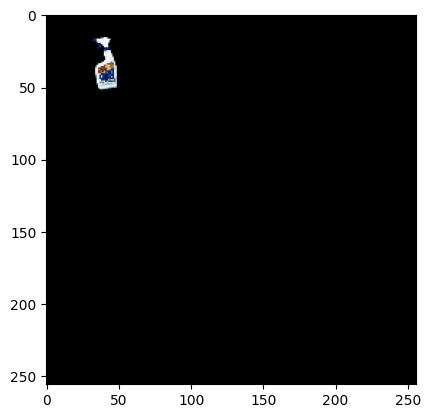

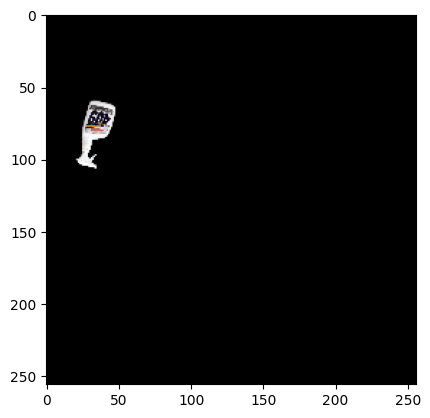

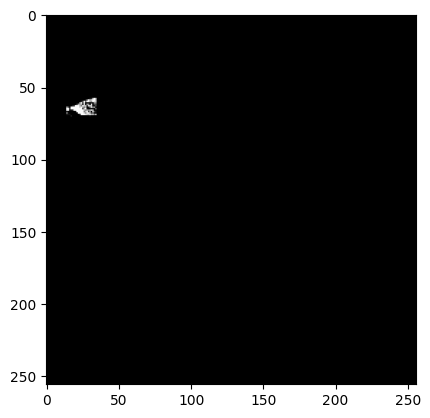

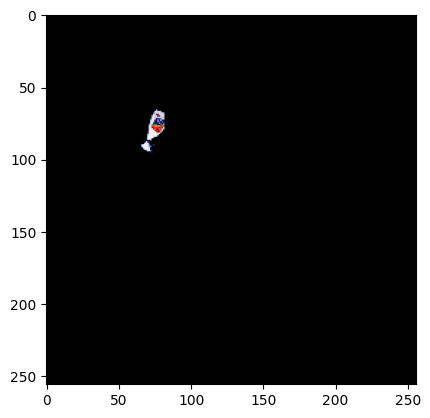

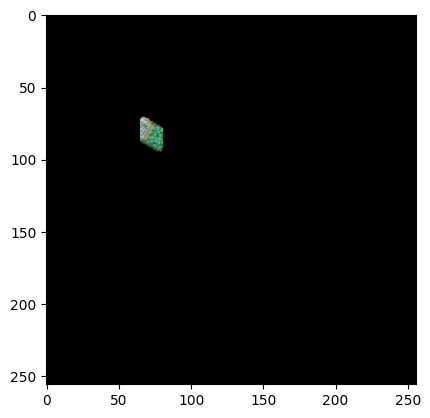

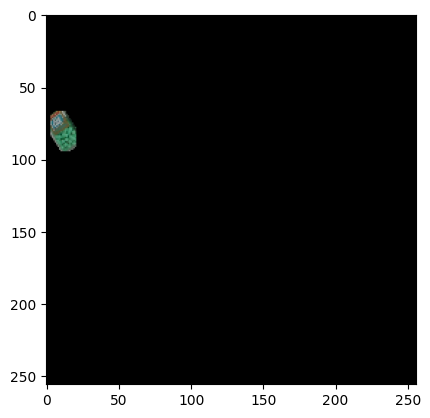

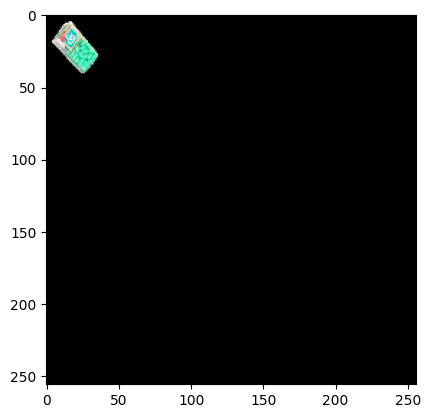

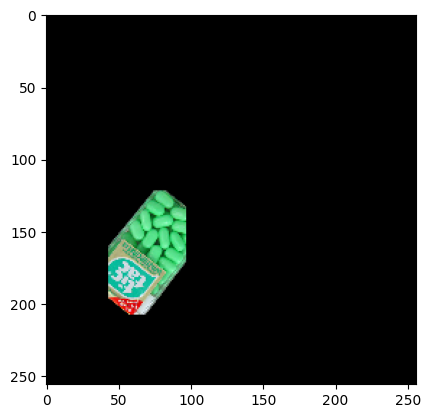

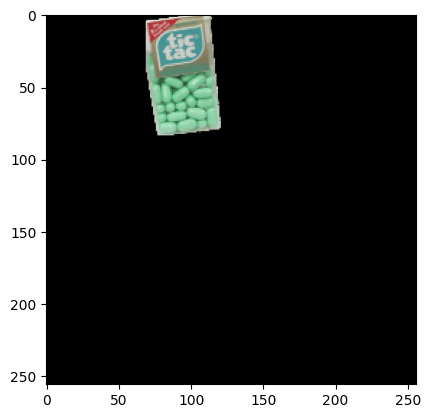

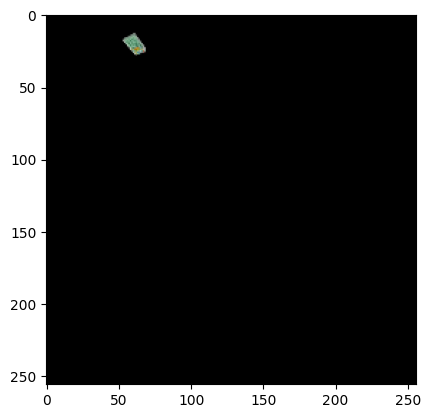

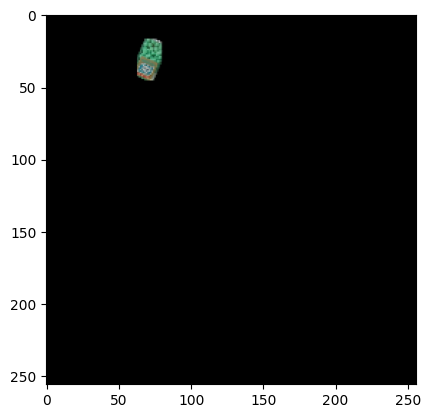

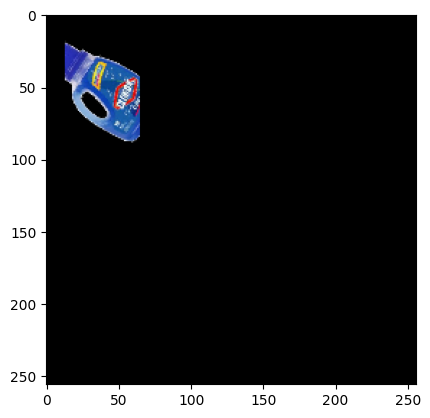

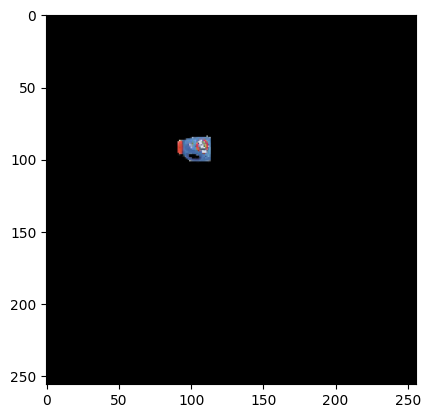

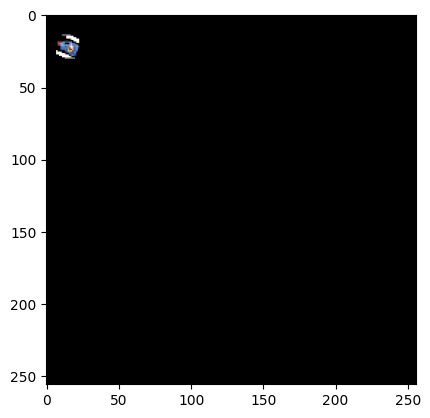

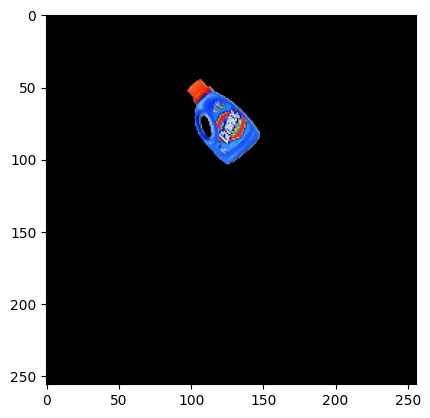

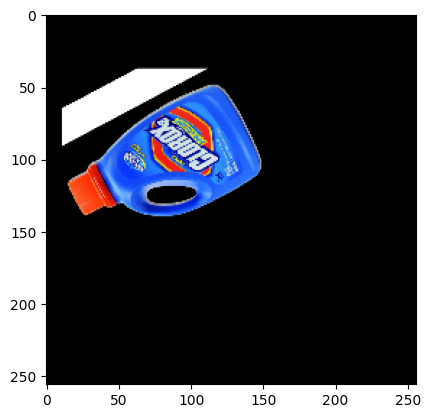

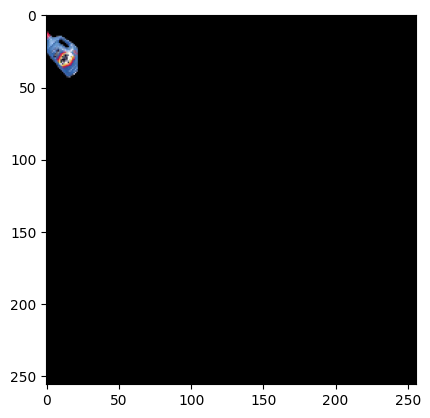

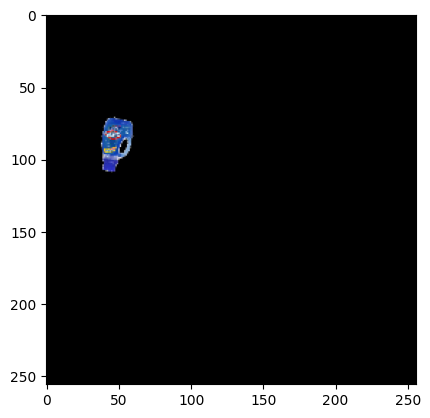

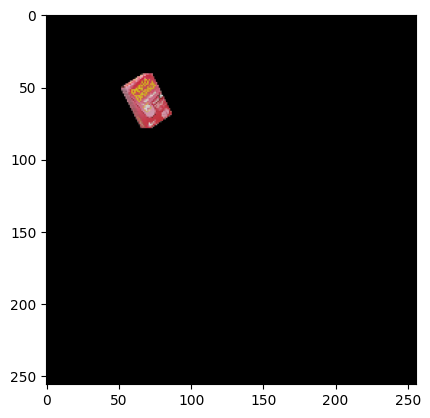

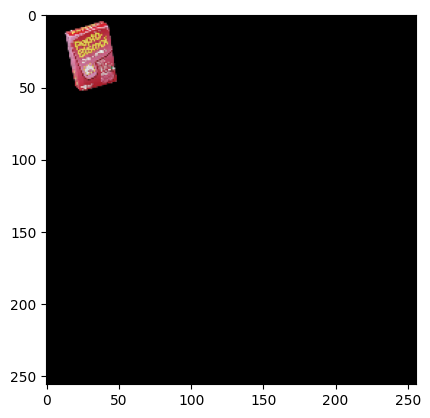

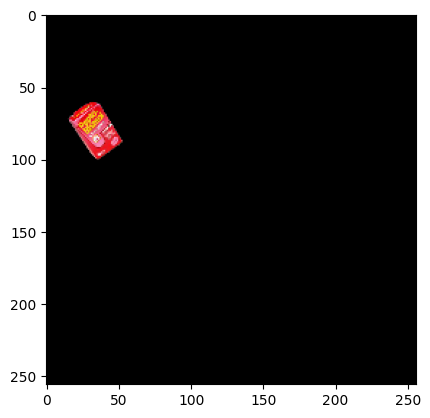

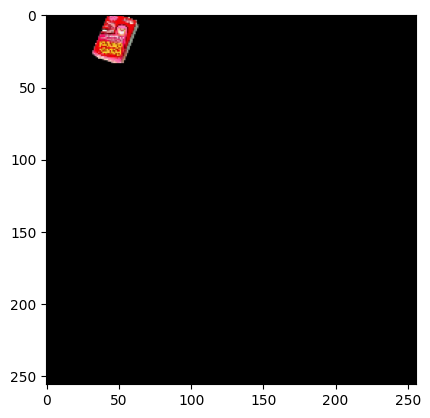

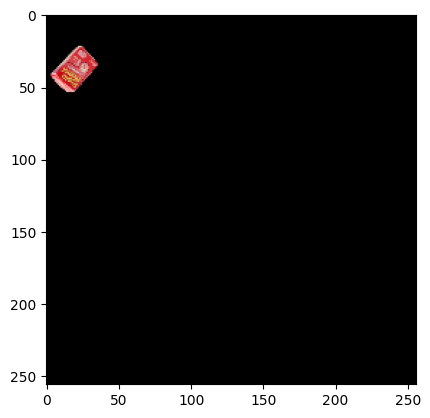

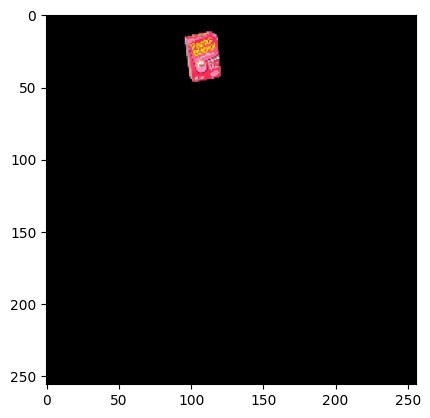

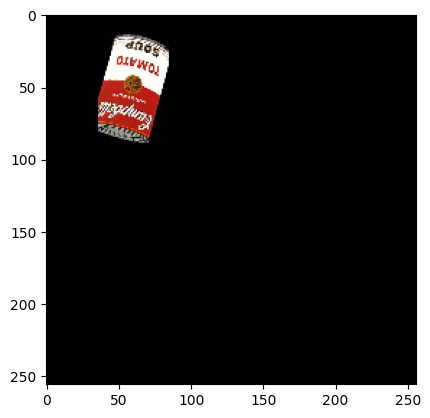

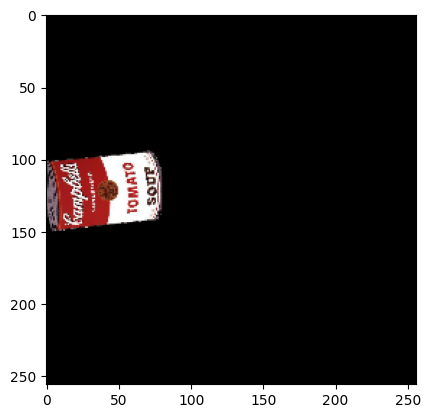

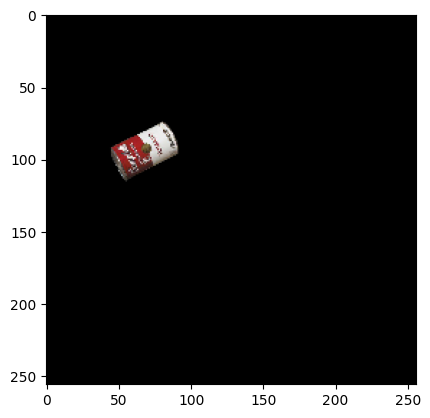

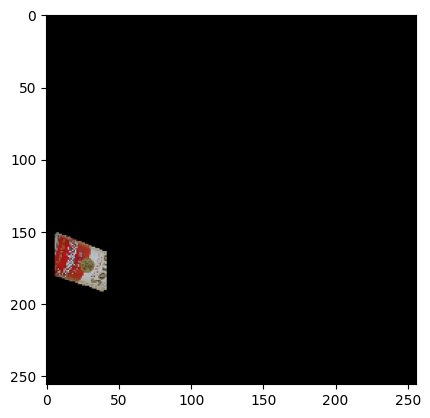

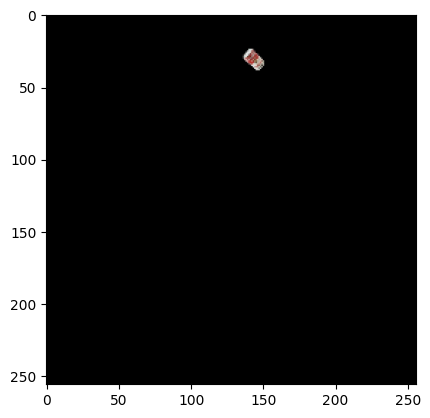

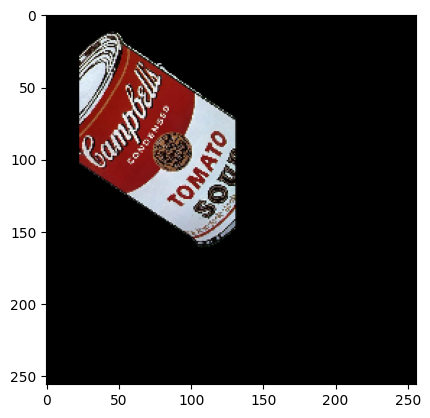

In [25]:
currpath="/kaggle/input/cvision/Data/Product Classification"
Classes=os.listdir(currpath)
Classes.sort( key=lambda x: int(x))
Classes=list(map(lambda x:currpath+"/"+x,Classes))
X_train,y_train,X_valid,y_valid= [], [], [], []
trainset=[]
validset=[]
mx=(0,0)
for Class in Classes:
    trainpart=os.listdir(Class+"/"+"Train")
    trainpart=list(map(lambda x:Class+"/"+"Train"+"/"+x,trainpart))
    for file in trainpart:
        if("Aug" not  in file):continue
        img = cv2.imread(file,1).astype('uint8')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(256,256))
        img=preprocess_input(img)
        plt.figure()
        plt.imshow(img)
        plt.show()

# **Face Recognition**

Facial Recognition System is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image.

We'll be building a face recognition model that uses Siamese Networks to give us a distance value that indicates whether 2 images are same or different.

The Dataset
We'll be using the Extracted Faces from face-recognition-dataset, which is derived from the LFW Dataset. The Extracted Faces contains faces extracted from the base images using Haar-Cascade Face-Detection (CV2).

* The dataset contains 1324 different individuals, with 2-50 images per person.
* The images are of size (128,128,3) and are encoded in RGB.
* Each folder and image is named with a number, i.e 0.jpg, 1.jpg

In [1]:
import os
import cv2
import time
import random
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.applications.convnext  import preprocess_input
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image 
import PIL
tf.__version__, np.__version__
import numpy as np
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import sys
class Image:
    def __init__(self, img, label):
        self.img = img
        self.label = label

def Load_Dataset():
    currpath="/kaggle/input/cvision/Data/Product Classification"
    Classes=os.listdir(currpath)
    Classes.sort( key=lambda x: int(x))
    Classes=list(map(lambda x:currpath+"/"+x,Classes))
    X_train,y_train,X_valid,y_valid= [], [], [], []
    trainset=[]
    validset=[]
    mx=(0,0)
    for Class in Classes:
        trainpart=os.listdir(Class+"/"+"Train")
        trainpart=list(map(lambda x:Class+"/"+"Train"+"/"+x,trainpart))
        for file in trainpart:
            if("Aug" in file):continue
            img = cv2.imread(file,1).astype('uint8')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(256,256))
            img=preprocess_input(img)
            label=Class.split("/")[-1]
            mx=max(mx,img.shape)
            trainset.append(Image(img,label))
            X_train.append(img)
            y_train.append(label)
        if "Validation"  not in os.listdir(Class):continue
        validpart=os.listdir(Class+"/"+"Validation")
        validpart=list(map(lambda x:Class+"/"+"Validation"+"/"+x,validpart))
        for file in validpart:
            img = cv2.imread(file,1).astype('uint8')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(256,256))
            img=preprocess_input(img)
            label=Class.split("/")[-1]
            validset.append(Image(img,label))
            X_valid.append(img)
            y_valid.append(label)
    return trainset,validset,X_train,y_train,X_valid,y_valid

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def rotate_image(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    
    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    return rotated_image

In [ ]:
for i  in range(10):
    print(np.random.randint(0,2))

In [3]:
def Shuffle(X,y):
    
    # Combine the two lists using zip
    combined_lists = list(zip(X,y))

    # Shuffle the combined lists
    np.random.shuffle(combined_lists)

    # Unpack the shuffled lists back into individual lists
    X, y = zip(*combined_lists)
    return X,y
    

In [4]:
def read_files_in_folder(folder_path):
    try:
        X_test = []
        y_test = []
        testset= []
        for label, class_name in enumerate(os.listdir(folder_path)):
            class_path = os.path.join(folder_path, class_name)
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                if os.path.isfile(file_path):
                    image = cv2.imread(file_path,1).astype('uint8')
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image=cv2.resize(image,(256,256))
                    image=preprocess_input(image)
                    X_test.append(image)
                    y_test.append(class_name)
                    testset.append(Image(image,label))
        return testset,X_test,y_test    
    except OSError as e:
        print(f"Error reading files in {folder_path}: {e}")

In [5]:
def preprocessing(DataSet):
    processed_images = []
    labels = []

    for image in DataSet:
        img = image.img
        # Resize the image
        # Normalize the image
        #normalized_image = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        # Gaussian Blur
        #blurred_image = cv2.GaussianBlur(normalized_image, (3, 3), 0)
        blurred_image=cv2.resize(img,(256,256))
        processed_images.append(blurred_image)
        labels.append(image.label)
    return processed_images,labels

In [6]:
trainset,validset,X_train,y_train,X_valid,y_valid=Load_Dataset()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [13]:
testset,X_test,y_test=read_files_in_folder("/kaggle/input/testset/Test Samples Classification")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [ ]:
lntrain=len(X_train)
for i in range(lntrain):
    Aug=np.random.randint(0,2)
    if Aug==1 and (y_train[i]=='16' or y_train[i]=='14' ):
        angle=np.random.randint(0,81)
        img=X_train[i]
        label=y_train[i]
        img=rotate_image(img,angle)
        X_train.append(img)
        y_train.append(label)
X_train,y_train=Shuffle(X_train,y_train)


## Creating the Model
Unlike a conventional CNN, the Siamese Network does not classify the images into certain categories or labels, rather it only finds out the distance between any two given images. If the images have the same label, then the network should learn the parameters, i.e. the weights and the biases in such a way that it should produce a smaller distance between the two images, and if they belong to different labels, then the distance should be larger

Siamese Network Image
![](https://miro.medium.com/max/2000/1*05hUCDHhnl4hdjqvdVTHtw.png)

In [8]:
from tensorflow.keras import backend, layers, metrics

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.applications import ConvNeXtLarge

from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

## Encoder
The Encoder is responsible for converting the passed images into their feature vectors. We're using a pretrained model, Xception model which is based on Inception_V3 model. By using transfer learning, we can significantly reduce the training time and size of the dataset.

The Model is connected to Fully Connected (Dense) layers and the last layer normalises the data using L2 Normalisation. (L2 Normalisation is a technique that modifies the dataset values in a way that in each row the sum of the squares will always be up to 1)

In [71]:
def get_encoder(input_shape):
    """ Returns the image encoding model """

    pretrained_model = ConvNeXtLarge(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )
    
    for i in range(len(pretrained_model.layers)-27):
        pretrained_model.layers[i].trainable = False

    encode_model = Sequential([
        pretrained_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
    ], name="Encode_Model")
    return encode_model

In [72]:
Encoder=get_encoder((256,256,3))

In [73]:
Encoder.load_weights("/kaggle/input/model-siamese/encoderV2.h5")

# Test Script

In [74]:
Encod_X_train=list()
print("TrainSet")
for i,img in enumerate (X_train) :
    if(i%10==0):
        print(f"Image no {i}")
    img=img.reshape((-1,256,256,3))
    EncodedImg=Encoder(img).numpy().reshape(256,)
    Encod_X_train.append(EncodedImg)

    

TrainSet
Image no 0
Image no 10
Image no 20
Image no 30
Image no 40
Image no 50
Image no 60
Image no 70
Image no 80
Image no 90
Image no 100
Image no 110
Image no 120
Image no 130


In [75]:
Encod_X_valid=list()
print("TestSet")
for i,img in enumerate(X_valid):
    if(i%10==0):
        print(f"Image no {i}")
    img=img.reshape((-1,256,256,3))
    EncodedImg=Encoder(img).numpy().reshape(256,)
    Encod_X_valid.append(EncodedImg)

TestSet
Image no 0
Image no 10
Image no 20
Image no 30


In [76]:
Encod_X_test=list()
print("TestSet")
for i,img in enumerate(X_test):
    if(i%10==0):
        print(f"Image no {i}")
    img=img.reshape((-1,256,256,3))
    EncodedImg=Encoder(img).numpy().reshape(256,)
    Encod_X_test.append(EncodedImg)

TestSet
Image no 0
Image no 10
Image no 20
Image no 30
Image no 40
Image no 50
Image no 60


In [77]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(Encod_X_train,y_train)

valid_pred=knn.predict(Encod_X_valid)

In [78]:
np.sum(valid_pred==y_valid)/len(y_valid)

1.0

In [79]:
train_pred=knn.predict(Encod_X_train)

In [80]:
np.sum(train_pred==y_train)/len(y_train)

1.0

In [82]:
test_pred=knn.predict(Encod_X_test)
print(f"the Accuracy is {np.sum(test_pred==y_test)/len(y_test)*100}")

the Accuracy is 88.23529411764706


In [83]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=1,random_state=2002)
model.fit(Encod_X_train,y_train)


SVC(C=1, random_state=2002)

In [84]:
test_valid=model.predict(Encod_X_valid)
print(np.sum(test_valid==y_valid)/len(y_valid))

1.0


In [85]:
test_valid=model.predict(Encod_X_train)
print(np.sum(test_valid==y_train)/len(y_train))

1.0


In [87]:
test_pred=model.predict(Encod_X_test)
print(f"the Accuracy is {np.sum(test_pred==y_test)/len(y_test)*100}")

the Accuracy is 88.23529411764706


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(Encod_X_train,y_train)


# Neural Network Part

In [ ]:
import numpy as np
import numpy as np
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from skimage import exposure
import sys
class Image:
    def __init__(self, img, label):
        self.img = img
        self.label = label
#For Trainset and Valid Set
def Load_Dataset():
    currpath="/kaggle/input/cvision/Data/Product Classification"
    Classes=os.listdir(currpath)
    Classes.sort( key=lambda x: int(x))
    Classes=list(map(lambda x:currpath+"/"+x,Classes))
    X_train,y_train,X_valid,y_valid= [], [], [], []
    trainset=[]
    validset=[]
    mx=(0,0)
    for Class in Classes:
        trainpart=os.listdir(Class+"/"+"Train")
        trainpart=list(map(lambda x:Class+"/"+"Train"+"/"+x,trainpart))
        for file in trainpart:
            #Uncomment this commetn if you want to enable augmnetation.
            #if ("Aug" in file):continue
            img=cv2.imread(file,0)
            label=Class.split("/")[-1]
            mx=max(mx,img.shape)
            trainset.append(Image(img,label))
            X_train.append(img)
            y_train.append(label)
        if "Validation"  not in os.listdir(Class):continue
        validpart=os.listdir(Class+"/"+"Validation")
        validpart=list(map(lambda x:Class+"/"+"Validation"+"/"+x,validpart))
        for file in validpart:
            img=cv2.imread(file,0)
            label=Class.split("/")[-1]
            validset.append(Image(img,label))
            X_valid.append(img)
            y_valid.append(label)
    return trainset,validset,X_train,y_train,X_valid,y_valid
 
# Some preprocessing
# def preprocessing(DataSet):
#     processed_images = []
#     labels = []

#     for image in DataSet:
#         img = image.img
#         # Resize the image
#         # Normalize the image
#         normalized_image = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
#         # Gaussian Blur
#         blurred_image = normalized_image
#         processed_images.append(blurred_image)
#         labels.append(image.label)

#     return processed_images, labels
def preprocessing(DataSet, target_size=(100, 100)):
    processed_images = []
    labels = []

    for image in DataSet:
        img = image.img
        # Resize the image
        resized_image = cv2.resize(img, target_size)
        # Normalize the image
        normalized_image = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        # Gaussian Blur
        blurred_image = normalized_image
        processed_images.append(blurred_image)
        labels.append(image.label)

    return processed_images, labels

# For Hidden Test Case
def read_files_in_folder(folder_path):
    try:
        X_test = []
        y_test = []
        testset= []
        for label, class_name in enumerate(os.listdir(folder_path)):
            class_path = os.path.join(folder_path, class_name)
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                if os.path.isfile(file_path):
                    image = cv2.imread(file_path)
                    X_test.append(image)
                    y_test.append(class_name)
                    testset.append(Image(image,label))
        return testset,X_test,y_test    
    except OSError as e:
        print(f"Error reading files in {folder_path}: {e}")
   


trainset,validset,X_train,y_train,X_valid,y_valid=Load_Dataset()
X_train_processed, y_train_processed = preprocessing(trainset)

X_valid_processed, y_valid_processed = preprocessing(validset)

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import resnet50

# ... (previous code)

# Resize images to a larger size
X_train_processed, y_train_processed = preprocessing(trainset, target_size=(150, 150))
X_valid_processed, y_valid_processed = preprocessing(validset, target_size=(150, 150))

# Convert labels to numerical values
label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_valid_numeric = np.array([label_mapping[label] for label in y_valid])

# Normalize the pixel values to be between 0 and 1
X_train_normalized = np.array(X_train_processed) / 255.0
X_valid_normalized = np.array(X_valid_processed) / 255.0

# Define a more complex neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          shear_range=0.2,
                                                          zoom_range=0.2,
                                                          horizontal_flip=True,
                                                          fill_mode='nearest')

datagen.fit(X_train_normalized.reshape(X_train_normalized.shape + (1,)))  # Add channel dimension for grayscale images

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(datagen.flow(X_train_normalized.reshape(X_train_normalized.shape + (1,)), y_train_numeric, batch_size=32),
          epochs=50,  # Increase the number of epochs
          validation_data=(X_valid_normalized.reshape(X_valid_normalized.shape + (1,)), y_valid_numeric),
          callbacks=[early_stopping])
# model.fit(datagen.flow(X_train_normalized.reshape(X_train_normalized.shape + (1,)), y_train_numeric, batch_size=32),
#           epochs=50,
#           validation_data=(X_valid_normalized.reshape(X_valid_normalized.shape + (1,)), y_valid_numeric))
# Save the model architecture as JSON
model_json = model.to_json()
with open("model_architecture1.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("model_weights1.h5")

# Save the entire model (architecture + weights)
model.save("complete_model1.h5")


Epoch 1/50
9/9 [==============================] - 11s 1s/step - loss: 3.1050 - accuracy: 0.0321 - val_loss: 2.9936 - val_accuracy: 0.0588
Epoch 2/50
9/9 [==============================] - 9s 974ms/step - loss: 2.9996 - accuracy: 0.0571 - val_loss: 2.9944 - val_accuracy: 0.0882
Epoch 3/50
9/9 [==============================] - 9s 979ms/step - loss: 2.9979 - accuracy: 0.0821 - val_loss: 2.9835 - val_accuracy: 0.0588
Epoch 4/50
9/9 [==============================] - 9s 975ms/step - loss: 2.9983 - accuracy: 0.0500 - val_loss: 2.9581 - val_accuracy: 0.2059
Epoch 5/50
9/9 [==============================] - 9s 1s/step - loss: 2.9764 - accuracy: 0.0750 - val_loss: 2.8937 - val_accuracy: 0.1176
Epoch 6/50
9/9 [==============================] - 9s 969ms/step - loss: 2.9552 - accuracy: 0.0786 - val_loss: 2.7944 - val_accuracy: 0.1471
Epoch 7/50
9/9 [==============================] - 9s 1s/step - loss: 2.9478 - accuracy: 0.1000 - val_loss: 2.7431 - val_accuracy: 0.1765
Epoch 8/50
9/9 [============